In [1]:
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# plt.rc('font', family='Libertine')
rc_fonts = {
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preview': True,
    'text.latex.preamble': [
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """],
}

In [3]:
query_file1 = 'val_qid_label2.json'
query_file2 = 'train_qid_label2.json'
query_file3 = 'test_qid_label2.json'
data_file1 = f"{query_file1[:query_file1.index('_')]}.txt"
data_file2 = f"{query_file2[:query_file2.index('_')]}.txt"
data_file3 = f"{query_file3[:query_file3.index('_')]}.txt"

In [4]:
def return_statistics(query_file, data_file):
    with open(query_file, 'r') as f:
        query_to_qid = json.load(f)
    all_data = []
    statistics = {}
    positve_cases = set()
    negative_cases = set()
    with open(data_file, 'r') as f:
        lines = f.readlines()
        for l in lines:
            data = l.split()
            key_to_value = {c.split(":")[0]:c.split(":")[1] for c in data[1:]}
            key_to_value['label'] = int(data[0])
            if key_to_value['qid'] in statistics:
                s = statistics[key_to_value['qid']]
            else:
                s = {'number': 0, 'positive': 0, 'negative': 0}
                statistics[key_to_value['qid']] = s
            s['number'] += 1
            if int(key_to_value['label']) == 1:
                s['positive'] += 1
                positve_cases.add(key_to_value['qid'])
            else:
                s['negative'] += 1
                negative_cases.add(key_to_value['qid'])
            all_data.append(key_to_value)

    both = list(positve_cases.intersection(negative_cases))
    for k, v in statistics.items():
        if 'positive' in v:
            if 'negative' in v:
                v['pp'] = v['positive'] / (v['negative']+ v['positive'])
            else:
                v['pp'] = 1
        else:
            v['pp'] = 0
    return statistics

In [5]:
statistics_val = return_statistics(query_file1, data_file1)
statistics_train = return_statistics(query_file2, data_file2)
statistics_test = return_statistics(query_file3, data_file3)

In [6]:
values_A_num = [v['number'] for k, v in statistics_val.items()] + [v['number'] for k, v in statistics_train.items()]
values_C_num = [v['number'] for k, v in statistics_test.items()]
values_A_pp = [v['pp'] for k, v in statistics_val.items()] + [v['pp'] for k, v in statistics_train.items()]
values_C_pp = [v['pp'] for k, v in statistics_test.items()]
bins = np.arange(0,15,2)

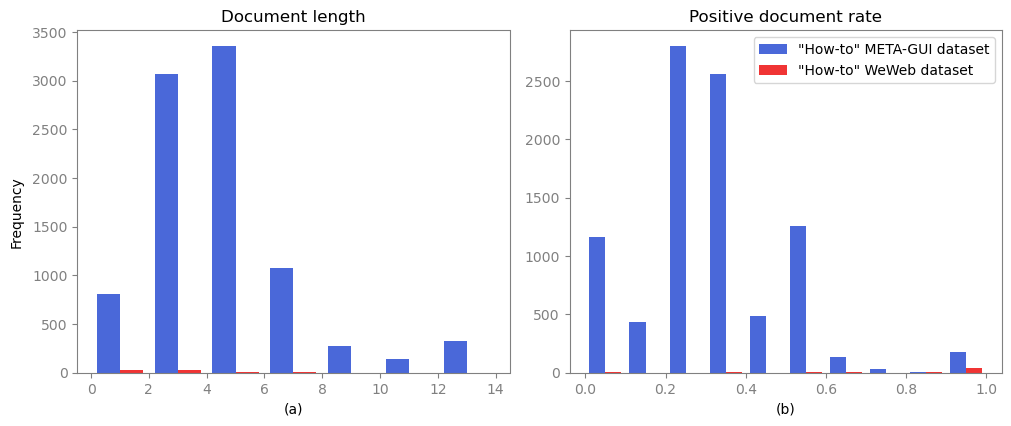

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist([np.clip(values_A_num, bins[0], bins[-1]), np.clip(values_C_num, bins[0], bins[-1])],
          bins=bins, color=['#4a68d9', '#f03434', ], label=['\"How-to\" META-GUI dataset', '\"How-to\" WeWeb dataset'])
ax2.hist([values_A_pp, values_C_pp], color=['#4a68d9', '#f03434',], label=['\"How-to\" META-GUI dataset', '\"How-to\" WeWeb dataset'])
# Set common labels
fig.text(0, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.tight_layout()
ax1.tick_params(color='gray', labelcolor='gray')
for spine in ax1.spines.values():
        spine.set_edgecolor('gray')
ax2.tick_params(color='gray', labelcolor='gray')
for spine in ax2.spines.values():
        spine.set_edgecolor('gray')
ax1.set_xlabel('(a)')
ax2.set_xlabel('(b)')
ax1.set_title('Document length')
ax2.set_title('Positive document rate')
plt.legend(loc='upper right')
plt.savefig('query_distribution.pdf', bbox_inches="tight")

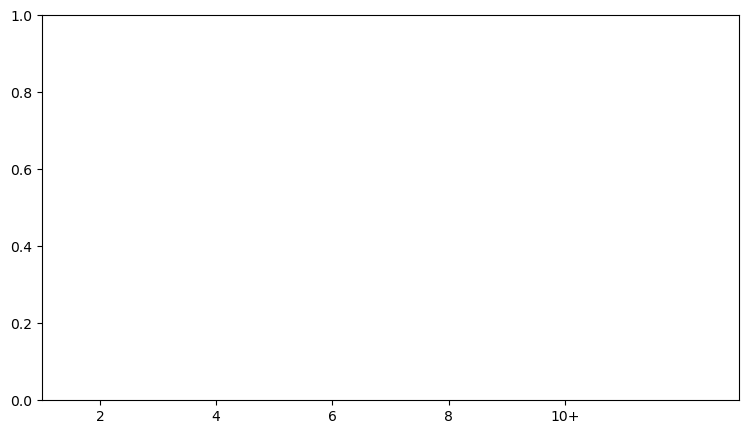

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
values_A_num = [v['number'] for k, v in statistics_val.items()] + [v['number'] for k, v in statistics_train.items()]
values_C_num = [v['number'] for k, v in statistics_test.items()]

bins = np.arange(0,12,2)

fig, ax = plt.subplots(figsize=(9, 5))
_, bins, patches = ax1.hist([np.clip(values_A_num, bins[0], bins[-1]),
                             np.clip(values_C_num, bins[0], bins[-1])],
                            bins=bins, color=['#3782CC', 'r'], label=['How-to META-GUI', 'How-to WeWeb'])

xlabels = bins[1:].astype(int).astype(str)
xlabels[-1] += '+'

N_labels = len(xlabels)
plt.xlim([0, 12])
plt.xticks(2 * np.arange(N_labels) + 1)
ax.set_xticklabels(xlabels)

plt.setp(patches, linewidth=0)
# plt.legend(loc='upper right')

plt.savefig('query_length_distribution.pdf')

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
values_A_pp = [v['pp'] for k, v in statistics_val.items()] + [v['pp'] for k, v in statistics_train.items()]
values_C_pp = [v['pp'] for k, v in statistics_test.items()]

fig, ax = ax2.subplots(figsize=(9, 5))
plt.hist([values_A_pp, values_C_pp], color=['#3782CC', 'r'], label=['How-to META-GUI', 'How-to WeWeb'])
plt.title('')
plt.setp(patches, linewidth=0)
plt.legend(loc='upper right')

AttributeError: 'AxesSubplot' object has no attribute 'subplots'